# QTM 385

> 
> Class 03/31 -- 
> Matplotlib
> 

**Important for the rest of the week**

1. There will be no quiz for today's class.

2. I posted two asynchronous DataCamp courses:
    + **Webscraping in Python**
    + **Dataviz with matplotlib**

3. Get ready to install MySQL and DBeaver. Tomorrow, I will send you a video with the installation procedures.

Do you have any questions?

# Matplotlib

Matplotlib is the main package for data visualization in Python.

To create a data visualization with matplotlib, we need to load the data into Python. We will work here with the datasets `uspop`, `tips` and `PErisk`.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the datasets

# US Population
uspop = pd.read_csv('uspop.csv', parse_dates = ['year'])
uspop = uspop.set_index('year')

# Political and Economic Risk
perisk = pd.read_csv('PErisk.csv')
perisk = perisk.set_index('country')

# Tips
tips = pd.read_csv('tips.csv')

**Exercise**: Check the head of the datasets. What do we have in each of them?

In [4]:
## Your answer here
uspop.head()

,uspop
year,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


In [6]:
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Australia,1,-6.907755,5,4,10.304840
Austria,1,-4.910337,5,4,10.100940
Bangladesh,0,0.775975,1,0,8.379768
Belgium,1,-4.617344,5,4,10.250120


In [7]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Lineplots

The default plot done by matplotlib is the lineplot. This type of plot is well suited for displaying time-series data, such as stock prices or country populations. Let's check how it works:

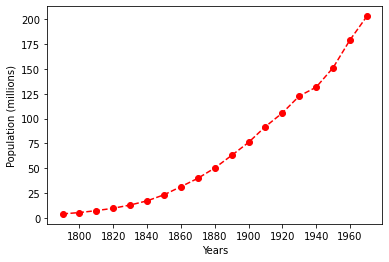

In [16]:
# My code here
fig, ax = plt.subplots() #to get started w/ plot, how to start any matplotlib plot
ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')
ax.set_xlabel('Years')
ax.set_ylabel('Population (millions)')
plt.show()

### Set Label Text

We can add labels using `set_xlabel` and `set_ylabel`.

In [4]:
# My code here

### Two plots in the same graph

Now, let us create the log of the population and add to the data:

In [18]:
# My code here
uspop['logpop'] = np.log(uspop['uspop'])
uspop.head()

,uspop,logpop
year,,
1790-01-01,3.93,1.368639
1800-01-01,5.31,1.669592
1810-01-01,7.24,1.979621
1820-01-01,9.64,2.265921
1830-01-01,12.90,2.557227


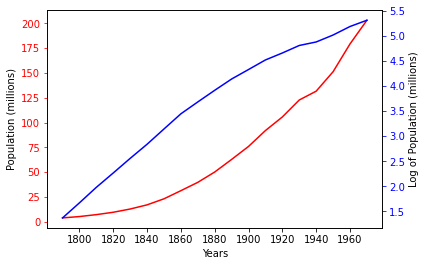

In [22]:
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red')

ax.set_ylabel('Population (millions)')

ax.tick_params('y', colors = 'red') #changes color on y axis

ax.set_xlabel('Years')

ax2 = ax.twinx() #how you would start going about creating an additional line on graph

ax2.plot(uspop.index, uspop['logpop'], color = 'blue')

ax2.set_ylabel('Log of Population (millions)')

ax2.tick_params('y', colors = 'blue') #changes color on y axis

plt.show()

We can put the plots together, changing the scale in the left and right hand sides. This is very useful to plot time series that have different axis values:

In [6]:
# My code here

## Bar-Charts

Bar-plots are useful to see the frequency in variables:

In [25]:
# My code here
perisk['exprisk'] = 5 - perisk['prsexp2']
tab = perisk['exprisk'].value_counts(sort = False)
tab

0    14
1    14
2    19
3     7
4     6
5     2
Name: exprisk, dtype: int64

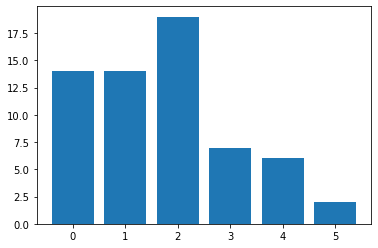

In [27]:
fig, ax = plt.subplots()
ax.bar(tab.index, tab)
plt.show()

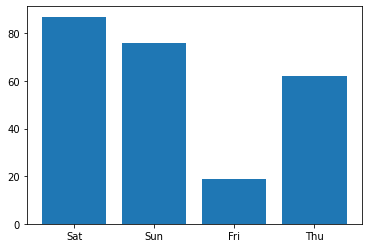

In [28]:
tab = tips['day'].value_counts(sort = False) #sometimes have to build table in order to plot
fig, ax = plt.subplots()
ax.bar(tab.index, tab)
plt.show()

**Exercise**: Do the same bar-chart with weekdays in the `tips` dataset.

## Histograms

To visualize numeric variables, the histogram is the best plot. For instance, here is a histogram of the log of gdp:

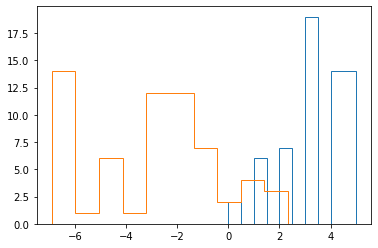

In [31]:
# My code here
#histogram assumption is that data is continuous, bars are right next to eachother
#unlike bar plots that are discrete

fig, ax = plt.subplots()
ax.hist(perisk['prsexp2'], histtype = 'step')
ax.hist(perisk['barb2'], histtype = 'step')
plt.show()

We can even add multiple variables to our plot:

In [9]:
# My code here

**Exercise**: Create a histogram of tips and total bill.

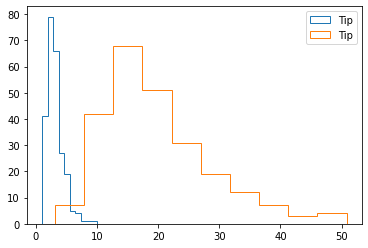

In [32]:
## Your code here
fig, ax = plt.subplots()
ax.hist(tips['tip'], bins = 10, histtype = 'step', label = 'Tip')
ax.hist(tips['totbill'], bins = 10, histtype = 'step', label = 'Tip')
ax.legend()
plt.show()

## Box-plots

To visualize numeric variables, the box-plots are also great plots:

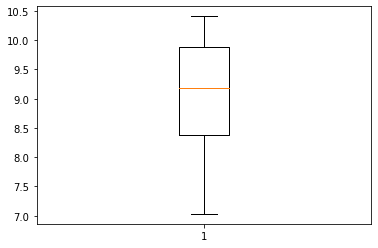

In [33]:
# My code here
fig, ax = plt.subplots()
ax.boxplot(perisk['gdpw2'])
plt.show()

**Exercise**: Create a boxplot of tips and total bill.

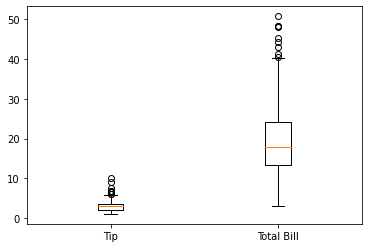

In [35]:
## Your code here
fig, ax = plt.subplots()

ax.boxplot([tips['tip'], tips['totbill']])

ax.set_xticklabels(['Tip', 'Total Bill'])

plt.show()

## Scatter-plots

Scatter-plots are great to display numeric x numeric relationships.

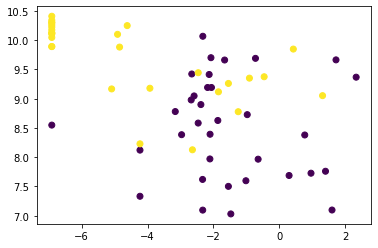

In [37]:
# My code here
fig, ax = plt.subplots()
ax.scatter(perisk['barb2'], perisk['gdpw2'], c = perisk['courts'])

plt.show()

#if you put a numeric variable in c, it will give you a gradient of colors

**Exercise**: Plot a scatter of total bill x tip in the tips dataset. Then color by the week day.

In [39]:
## Your code here
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


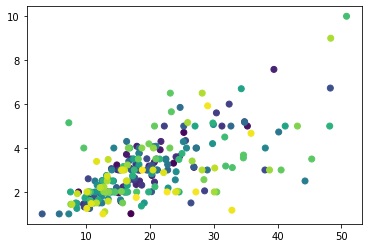

In [43]:
fig, ax = plt.subplots()
ax.scatter(tips['totbill'], tips['tip'], c = tips['obs']) #builds a gradient will all colors

plt.show()

#variable you input to c has to be numeric

**And we are done with Python! Great job!!!**